In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
%matplotlib inline

2024-08-16 08:19:47.720701: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-16 08:19:47.907465: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-16 08:19:48.166695: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-16 08:19:48.364551: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-16 08:19:48.365866: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-16 08:19:48.698511: I tensorflow/core/platform/cpu_feature_guard.cc:

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

In [4]:
#Shape of Each Training Set
X_train[0].shape

(28, 28)

<Figure size 640x480 with 0 Axes>

<Figure size 50x30 with 0 Axes>

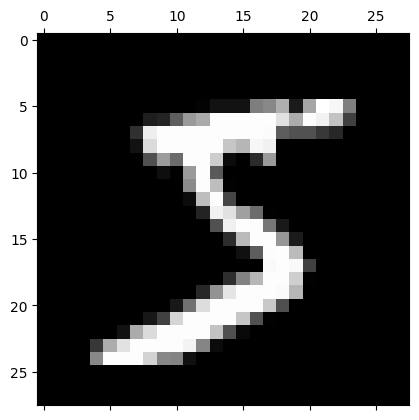

In [5]:
#Preview of each Training Set
plt.gray()
plt.figure(figsize=(0.5,0.3))
plt.matshow(X_train[0])

In [6]:
X_trainf = X_train.reshape(len(X_train),28*28)
X_testf = X_test.reshape(len(X_test),28*28)

In [7]:
y_train[0]

5

In [8]:
# Feature Scaling
xsc = MinMaxScaler()
X_trains = xsc.fit_transform(X_trainf)
X_tests = xsc.fit_transform(X_testf)

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(units= 100, activation= "relu"),
    Dense(units= 50, activation= "relu"),
    Dense(units= 10, activation= "sigmoid")
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq= 1) #Calling Logs

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics= ['accuracy']

)

model.fit(X_trains,y_train,epochs= 10,callbacks= [tb_callback])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8733 - loss: 0.4428
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9638 - loss: 0.1216
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9754 - loss: 0.0788
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9805 - loss: 0.0589
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9846 - loss: 0.0487
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9892 - loss: 0.0362
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9895 - loss: 0.0302
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9918 - loss: 0.0259
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9934 - loss: 0.0204
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9936 - loss: 0.0196


In [10]:
# prediction added
prediction = model.predict(X_tests)
print(prediction[15])
print(f"Number: {np.argmax(prediction[15])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[1.7595015e-04 4.4486887e-04 2.1518370e-05 9.9903071e-01 3.9812917e-09
 1.0000000e+00 5.1209056e-03 1.1314933e-04 3.9385967e-02 3.0430563e-04]
Number: 5


In [11]:
model.evaluate(X_tests,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9690 - loss: 0.1375


[0.1168217658996582, 0.972599983215332]

In [12]:
# List comprehension having predicted numbers
y_predicted = [np.argmax(i) for i in prediction]
cm  = tf.math.confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'Confusion Matrix')

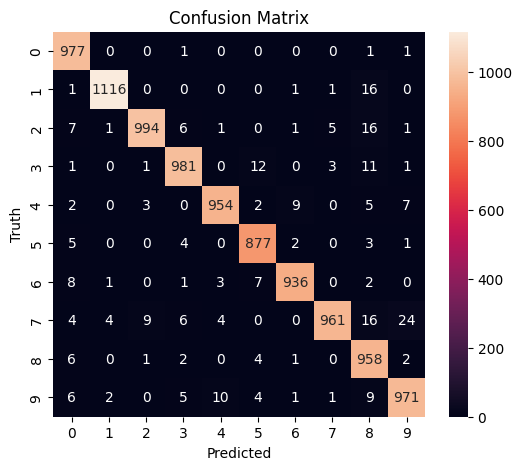

In [13]:
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot = True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix")